# Imports

In [1]:
##########
# basics #
##########

import warnings
warnings.filterwarnings('ignore')
import collections
import datetime
import glob
import hashlib
import itertools
import math
import operator
import os
import pickle
import random
import re
import string
import sys
import time

###########
# science #
###########

import scipy as sp
import numpy as np
import pandas as pd
rseed = random.seed(42)
np.random.seed(rseed)

######
# ml #
######

import xgboost as xgb
import theano as thno
import tensorflow as tf
import keras as krs

###################
# sklearn tooling #
###################

from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn import grid_search
from sklearn import pipeline
from sklearn import feature_selection

#################
# visualization #
#################

# plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
import cufflinks as cf
tls.set_credentials_file(username=os.environ.get('PLOTLY_USERNAME'), api_key=os.environ.get('PLOTLY_APIKEY'))
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

# matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
mpl.rcParams['figure.figsize']=(12.0,4.0)
%matplotlib inline

# seaborn
#import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_palette('muted', n_colors=15, desat=None)
#sns.set_context("notebook", font_scale=1.5,
#                rc={"lines.linewidth": 2.5})

#graphistry
import graphistry
graphistry.register(key=os.environ.get('GRAPHISTRY_APIKEY'))

############
# sys info #
############

%reload_ext watermark
%watermark -a "Ken Cavagnolo" -n -u -v -m -h -g -p numpy,scipy,pandas,\
sklearn,theano,tensorflow,keras,xgboost,\
matplotlib,seaborn,plotly,graphistry

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


OSError: dlopen(/usr/local/lib/python2.7/site-packages/xgboost/./lib/libxgboost.so, 6): Symbol not found: ___emutls_get_address
  Referenced from: /usr/local/opt/gcc/lib/gcc/5/libgomp.1.dylib
  Expected in: /usr/lib/libSystem.B.dylib
 in /usr/local/opt/gcc/lib/gcc/5/libgomp.1.dylib

In [3]:
import matplotlib.image as mpimg

# Color Selection

In [4]:
# Read in the image and print out some stats
image = (mpimg.imread('test.png')*255).astype('uint8')
print 'This image is: ', type(image), '\n', 'with dimensions:', image.shape

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define our color selection criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Use a "bitwise OR" to identify pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[color_thresholds] = [0,0,0]

# Display the image     
plt.figure(figsize=(20,20))
plt.imshow(color_select)

This image is:  <type 'numpy.ndarray'> 
with dimensions: (540, 960, 3)


NameError: name 'plt' is not defined

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   49.,   51.,   40.,   46.,   64.,   46.,   47.,
          48.,   45.,   38.,   45.,   30.,   51.,   50.,   49.,   39.,
          49.,   58.,   51.,   75.,   67.,   86.,   93.,  110.,  124.,
         186.,  214.,  248.,  276.,  313.,  196.,  142.,   52.,    6.,   20.]),
 array([ 155.,  156.,  157.,  158.,  159.,  160.,  161.,  162.,  163.,
         164.,  165.,  166.,  167.,  168.,  169.,  170.,  171.,  172.,
         173.,  174.,  175.,  176.,  177.,  178.,  179.,  180.,  181

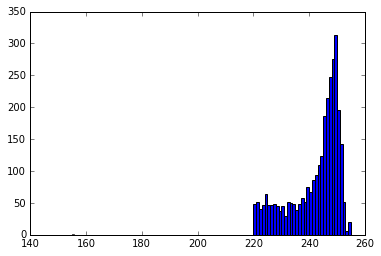

In [86]:
a = color_select[:,:,0].flatten()
plt.hist(a, range=(155,255), bins=100)

# Region Selection

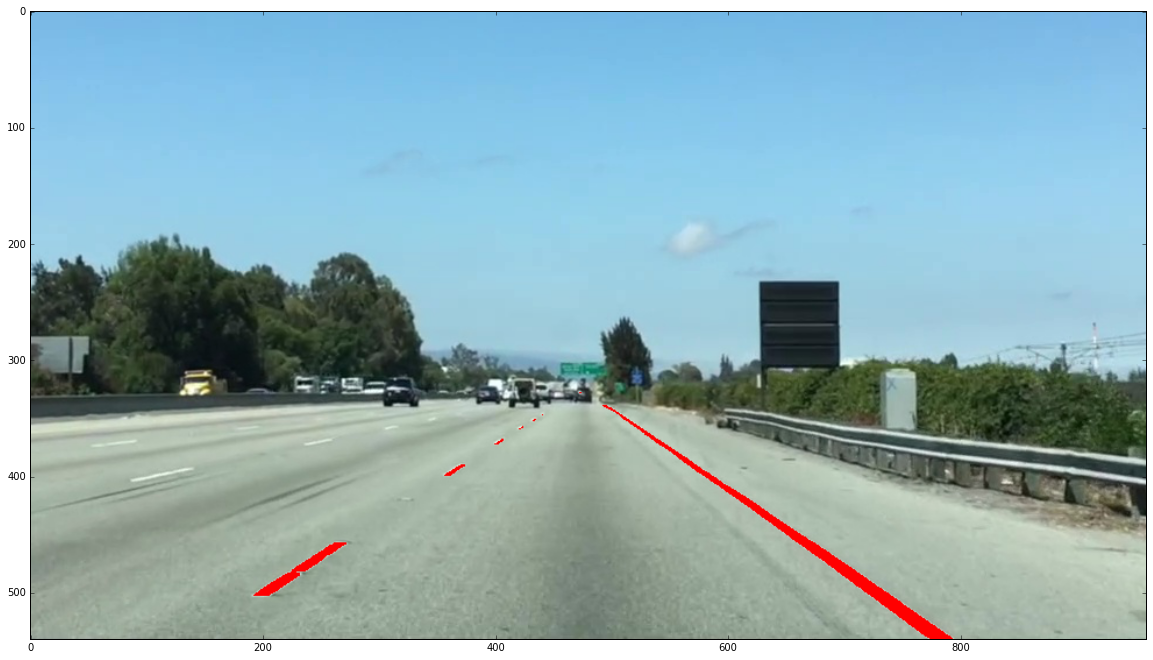

In [98]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
left_bottom = [125, image.shape[0]]
right_bottom = [800, image.shape[0]]
apex = [475,325]


# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display the image
plt.figure(figsize=(20,20))
plt.imshow(line_image)